In [5]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv("D:\Fiap\Python projects\DataScience\data\Twitter_Data.csv")

# Visualizar as primeiras linhas do dataset
print(df.head())

# Checar a distribuição dos sentimentos
print(df["category"].value_counts())

<>:4: SyntaxWarning: invalid escape sequence '\F'
<>:4: SyntaxWarning: invalid escape sequence '\F'
C:\Users\pedro\AppData\Local\Temp\ipykernel_28700\2558717024.py:4: SyntaxWarning: invalid escape sequence '\F'
  df = pd.read_csv("D:\Fiap\Python projects\DataScience\data\Twitter_Data.csv")


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


In [10]:
# Remover linhas onde clean_text é nulo
df = df.dropna(subset=["clean_text"])
df = df.dropna(subset=["category"])

# Verificar se ainda há nulos
print(df["clean_text"].isnull().sum())  # Deve retornar 0

0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorização usando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")

# Separar os dados em treino e teste
X = vectorizer.fit_transform(df["clean_text"])
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Treinar o modelo
modelo_lr = LogisticRegression(max_iter=200)
modelo_lr.fit(X_train, y_train)

# Fazer previsões
y_pred_lr = modelo_lr.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

        -1.0       0.86      0.74      0.80      7102
         0.0       0.80      0.96      0.87     11042
         1.0       0.90      0.83      0.87     14450

    accuracy                           0.86     32594
   macro avg       0.86      0.84      0.85     32594
weighted avg       0.86      0.86      0.85     32594



In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Treinar o modelo
modelo_nb = MultinomialNB()
modelo_nb.fit(X_train, y_train)

# Fazer previsões
y_pred_nb = modelo_nb.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

        -1.0       0.86      0.44      0.58      7102
         0.0       0.79      0.64      0.71     11042
         1.0       0.65      0.90      0.75     14450

    accuracy                           0.71     32594
   macro avg       0.77      0.66      0.68     32594
weighted avg       0.74      0.71      0.70     32594



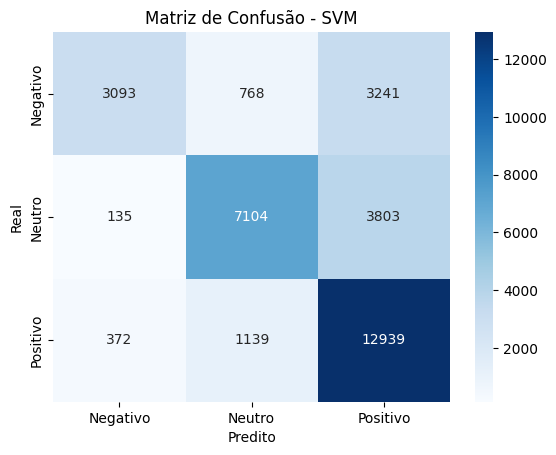

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Neutro", "Positivo"], yticklabels=["Negativo", "Neutro", "Positivo"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Naive Bayes")
plt.show()

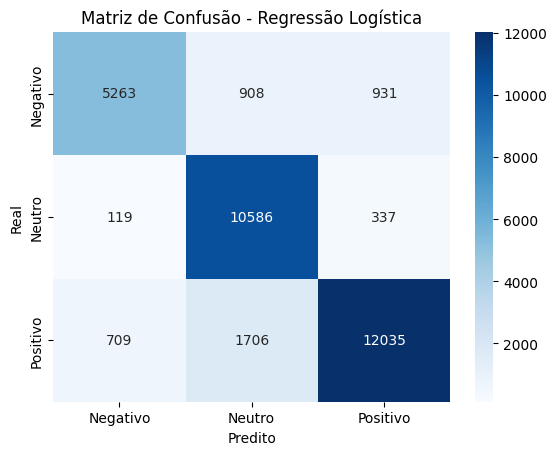

In [16]:
# Matriz de Confusão para o modelo de Regressão Logística
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Neutro", "Positivo"], yticklabels=["Negativo", "Neutro", "Positivo"]) 
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

C:\Users\pedro\AppData\Local\Temp\ipykernel_28700\2226213942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="category", data=df, palette="viridis")


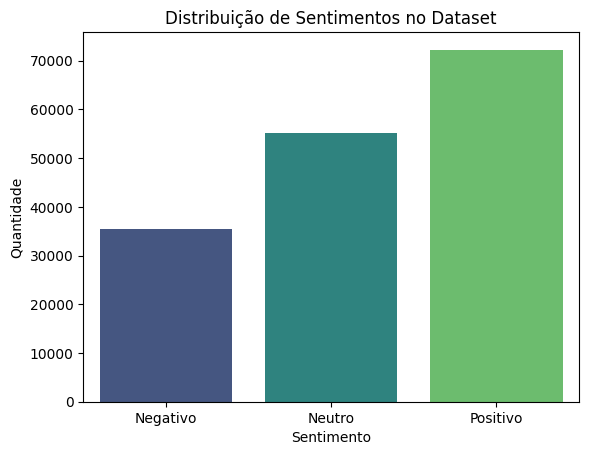

In [14]:
sns.countplot(x="category", data=df, palette="viridis")
plt.title("Distribuição de Sentimentos no Dataset")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade")
plt.xticks(ticks=[0, 1, 2], labels=["Negativo", "Neutro", "Positivo"])
plt.show()

In [17]:
# Função para classificar um texto
def classificar_texto(texto):
    texto = vectorizer.transform([texto])
    return modelo_lr.predict(texto)[0]

# Testar a função
print(classificar_texto("I hate you"))  # Negativo
print(classificar_texto("I love you"))  # Positivo

-1.0
1.0
